In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

In [20]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

In [21]:
# Separate our independent variables from our target variable.
X = churn_df.drop(columns = ['churn'])
y = churn_df['churn']

# Split our data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Standardize our independent train and test sets.
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Pick and train our model on the training data
model = LogisticRegression().fit(X_train_scaled, y_train)

# Use the learned weights to make predictions
y_hat = model.predict(X_test_scaled)

# We can check the probability our model gave each data point to be in either class 0 or class 1. The first column is the probability of the data point being in
# class 0, and the second column is the probability of the data point being in class 1.
y_hat_prob = model.predict_proba(X_test_scaled)

# Lastly, we can evaluate our model using the cross entropy loss.
log_loss(y_test, y_hat_prob)

0.4074434664715046

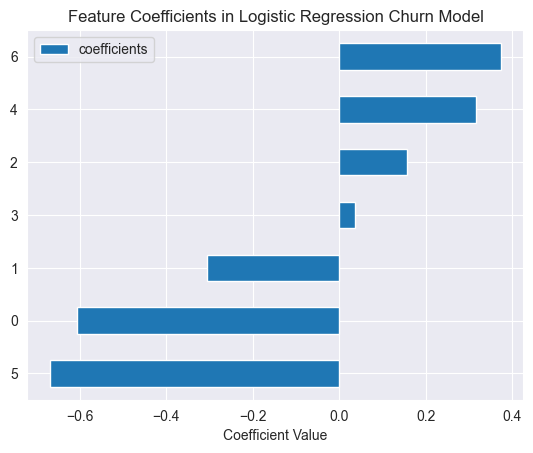

In [37]:
# Analyse how each coefficient affects the likelihood of choosing class 1. The more positive the coefficient, the more it pushes our model to choose class 1.
# The more negative it is, the more it pushes our model to choose class 0.
coefficients = pd.DataFrame(model.coef_[0], columns = ["coefficients"])
coefficients.sort_values(by = "coefficients").plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [16]:
# For simplicity, let's use two input variables to plot the outcome of our model.
churn_df.corr()

,tenure,age,address,income,ed,employ,equip,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,0.275284
churn,-0.376860,-0.287697,-0.260659,-0.090790,0.216112,-0.337969,0.275284,1.000000


In [17]:
# Let's use variables that have a large positive and negative coefficients, as well as low correlation. Tenure and equip are ideal here.
churn_df_updated = churn_df[["tenure", "equip", "churn"]]

# Separate our independent variables from our target.
X = churn_df_updated.drop(columns = ["churn"])
y = churn_df_updated["churn"]

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize our independent variables.
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Choose and train our model.
model = LogisticRegression().fit(X_train_scaled, y_train)

# Find the probability of assigning each datapoint (row) to either class 0 or class 1.
y_hat_prob = model.predict_proba(X_test_scaled)

# Evaluate our model using cross entropy loss
log_loss(y_test, y_hat_prob)

0.38552543649380383